In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [3]:
def bin_sfr(t, sfr, bin_width=0.01):
    bin_left = 0.0
    bin_right = bin_left + bin_width
    
    ave_sfr = []
    ave_t = []
    
    max_val = np.max(t)
    while bin_left < max_val:
        key = np.logical_and(t >=bin_left, t<bin_right)
        ave_sfr.append(np.mean(sfr[key]))
        ave_t.append(np.mean(t[key]))
        
        bin_left += bin_width
        bin_right += bin_width
        
    return np.array(ave_t), np.array(ave_sfr)

(0.0, 2.0)

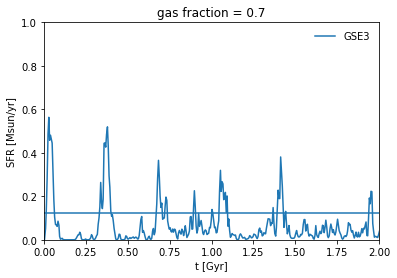

In [4]:
bin_width = 0.005

# sfh_file = np.genfromtxt(basepath+'runs/GSE2iso_fg0.7/lvl4/output/sfr.txt')
# time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2], bin_width=bin_width)
# plt.plot(time, sfr, label='lvl 4')

# key = np.logical_and(sfh_file[:,0] > 0.5, sfh_file[:,0] < 1)
# preint(np.mean(sfh_file[:,2][key]))

sfh_file_l2 = np.genfromtxt(basepath+'runs/GSE2iso_fg0.7/lvl4/output/sfr.txt')
time_l2, sfr_l2 = bin_sfr(sfh_file_l2[:,0], sfh_file_l2[:,2], bin_width=bin_width)
# plt.plot(time_l2, sfr_l2, label='GSE2')

sfh_file_l3 = np.genfromtxt(basepath+'runs/GSE3iso_fg0.7/lvl4/output/sfr.txt')
time_l3, sfr_l3 = bin_sfr(sfh_file_l3[:,0], sfh_file_l3[:,2], bin_width=bin_width)
plt.plot(time_l3, sfr_l3, label='GSE3')

# sfh_file_l2 = np.genfromtxt(basepath+'runs/MW3iso_fg0.7/lvl2/output/sfr.txt')
# time_l2, sfr_l2 = bin_sfr(sfh_file_l2[:,0], sfh_file_l2[:,2], bin_width=bin_width)
# plt.plot(time_l2, sfr_l2, label='lvl 2')

plt.legend(frameon=False)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.title('gas fraction = 0.7')
# plt.axhline(10, c='k', ls='dashed')
# plt.axhline(15, c='k', ls='dashed')
plt.axhline(5E8/4E9)

plt.ylim(0, 1.0)
plt.xlim(0, 2)